■ The progam for conducting Leave-One-Out Cross Validation using seven ML models with newMaxGD2.csv file on Google Colaboratory. 

◇ This program is written for use on Google Cobaboratory.

#1 Environment Setting

## 1) Mount this file on Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2) Data preparation : [Important]  Change the pass for a dataset

In [ ]:
# Loading modules
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

# Change the pass: 'drive/My Drive/program/data/renaldata.clsv' to a new pass where newMaxGD2.csv is located in your enviromnent 
df = pd.read_csv('drive/My Drive/program/data/newMaxGD2.csv')
print('Number of colums and rows')
print(df.shape)
print()
print('Number of empty cells')
pd.set_option('display.max_rows', 1000)
df.isnull().sum()

Number of colums and rows
(43, 61)

Number of empty cells


blank・forRBx・M                                      0
pMen                                                0
age・DATEDIF                                         0
localization3・RenalCortex・1innner・2middle・3outer    0
arteriolosclerosisG03                               0
intimaThickened・G03                                 0
interstitial・Inflammation・Percent                   0
interstitial・fibrosis・Percent                       0
nGlomuruli                                          0
rGS・Percent                                         0
rFGS・Percent                                        0
rOxfordS1                                           0
rOxfordM1                                           0
nMesCells・perLesion                                 0
rMesG03                                             0
rOxfordE1                                           0
rCrescent・Percent・C                                 0
rCrescent・Percent・F                                 0
rOxfordC2                   

In [ ]:
# Interpolation of missing data   　df2: pandas data、    data: numpy data
df2 = df.fillna(df.median())
data = df2.values

df2.isnull().sum()

blank・forRBx・M                                      0
pMen                                                0
age・DATEDIF                                         0
localization3・RenalCortex・1innner・2middle・3outer    0
arteriolosclerosisG03                               0
intimaThickened・G03                                 0
interstitial・Inflammation・Percent                   0
interstitial・fibrosis・Percent                       0
nGlomuruli                                          0
rGS・Percent                                         0
rFGS・Percent                                        0
rOxfordS1                                           0
rOxfordM1                                           0
nMesCells・perLesion                                 0
rMesG03                                             0
rOxfordE1                                           0
rCrescent・Percent・C                                 0
rCrescent・Percent・F                                 0
rOxfordC2                   

In [ ]:
# Dividing explanatory variables and target variable
x = df2.iloc[:, :-1].values
t = df2.iloc[:, -1].values

# splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

Number of columns and rows
(43, 61)

[[  7.     1.    26.   ...   0.63   0.     1.  ]
 [ 51.     1.    41.   ...   1.6    1.     0.  ]
 [257.     1.    44.   ...   1.5    1.     1.  ]
 ...
 [100.     1.    42.   ...   1.63   0.     0.  ]
 [ 15.     1.    43.   ...   1.13   1.     0.  ]
 [ 17.     1.    51.   ...   0.28   0.     0.  ]]

Distribution of target value


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


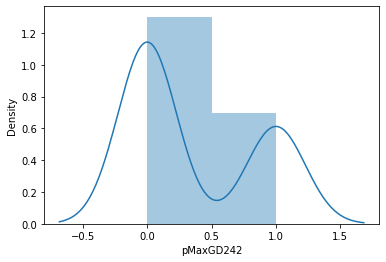

In [ ]:
# Size of dataset
print('Number of columns and rows')
print(df2.shape)
print()
print(data)
df2.head()
# Distribution of target
print()
print('Distribution of target value')
sns.distplot(df2.iloc[:,-1].dropna())

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 61 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   blank・forRBx・M                                    43 non-null     int64  
 1   pMen                                              43 non-null     int64  
 2   age・DATEDIF                                       43 non-null     int64  
 3   localization3・RenalCortex・1innner・2middle・3outer  43 non-null     int64  
 4   arteriolosclerosisG03                             43 non-null     int64  
 5   intimaThickened・G03                               43 non-null     int64  
 6   interstitial・Inflammation・Percent                 43 non-null     int64  
 7   interstitial・fibrosis・Percent                     43 non-null     int64  
 8   nGlomuruli                                        43 non-null     int64  
 9   rGS・Percent            

In [ ]:
df2.describe()

,blank・forRBx・M,pMen,age・DATEDIF,localization3・RenalCortex・1innner・2middle・3outer,arteriolosclerosisG03,intimaThickened・G03,interstitial・Inflammation・Percent,interstitial・fibrosis・Percent,nGlomuruli,rGS・Percent,rFGS・Percent,rOxfordS1,rOxfordM1,nMesCells・perLesion,rMesG03,rOxfordE1,rCrescent・Percent・C,rCrescent・Percent・F,rOxfordC2,rCrescent・Percent・C・FC・F,pAdhesion,pThichness・Membane,pPerihylar・Lesion,protein・Iintake・perKg・IBW,pNephroticS,pEdema,ｃBMI,cSBP,cDBP,cPP,cMBP,wbc,hb,plt,tp,alb,eGFR・Baseline,pAKI,crp,igG,igA,igM,c3c,c4,cUP・gday・forAnalyses,salt・gday,uRBC・counts,uWBC・counts,pHTN・Drug・14090,pHC・Drug・TC220,pTG・Drug・TG150,pHU・Drug・UA７,pFamilyH,cHeight・ｍ,cBW・ｋｇ,cProgGrade4・Japan,cHematuria・qual・Mean10y20p,pIncrease・Hematuria・qual・10y,cUP・qual・Mean10y20p,increaseUP・qual・10y,pMaxGD242
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.00000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.00000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,80.093023,0.604651,39.325581,1.976744,1.000000,0.674419,7.790698,11.116279,13.395349,17.381395,16.041860,0.813953,0.813953,6.813953,2.255814,0.534884,9.390698,1.230233,0.651163,10.618605,0.093023,0.093023,0.418605,1.051395,0.139535,0.139535,25.362791,143.116279,82.348837,60.767442,102.620930,67.813953,14.187209,21.55814,6.481395,3.788372,78.555814,0.116279,0.142209,1141.767442,337.162791,166.023256,90.372093,36.895349,1.794186,8.566977,38.604651,5.488372,0.767442,0.232558,0.372093,0.27907,0.139535,1.633953,68.167442,2.906977,1.418605,0.395349,1.279767,0.372093,0.348837
std,88.920996,0.494712,9.738781,0.672181,0.786796,0.747087,8.331118,10.823716,5.508174,16.073007,15.497976,0.393750,0.393750,1.531507,0.789606,0.504685,14.435931,3.226124,0.650411,15.138382,0.293903,0.293903,0.499169,0.258923,0.350605,0.350605,4.328753,22.203828,15.425526,13.410794,16.824593,12.791842,2.038063,6.07290,0.586457,0.391097,17.545591,0.324353,0.187922,320.971801,139.702734,92.016429,18.976205,10.728000,1.491610,3.054627,53.487043,15.417016,0.427463,0.427463,0.489083,0.45385,0.350605,0.082437,15.310139,0.526170,0.757268,0.494712,0.827606,0.489083,0.482243
min,1.000000,0.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.540000,0.000000,0.000000,16.800000,96.000000,48.000000,38.000000,64.000000,42.000000,9.800000,12.40000,5.300000,2.900000,50.100000,0.000000,0.010000,698.000000,118.000000,41.000000,56.000000,20.000000,0.000000,2.490000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.470000,41.600000,1.000000,0.000000,0.000000,0.170000,0.000000,0.000000
25%,16.000000,0.000000,33.000000,2.000000,0.500000,0.000000,0.000000,5.000000,9.500000,4.600000,0.000000,1.000000,1.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.915000,0.000000,0.000000,22.900000,126.000000,73.500000,50.000000,92.850000,59.000000,12.550000,16.50000,6.150000,3.600000,66.350000,0.000000,0.045000,911.000000,223.000000,100.500000,81.500000,31.000000,0.790000,6.455000,3.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.565000,56.550000,3.000000,1.000000,0.000000,0.575000,0.000000,0.000000
50%,42.000000,1.000000,41.000000,2.000000,1.000000,1.000000,5.000000,5.000000,13.000000,14.300000,14.700000,1.000000,1.000000,7.000000,2.000000,1.000000,5.900000,0.000000,1.000000,6.300000,0.000000,0.000000,0.000000,1.010000,0.000000,0.000000,25.100000,143.000000,80.000000,60.000000,100.000000,

## 3) Installation of Optuna and XGBoost

In [ ]:
# Installation of Optuna
!pip install optuna

     |████████████████████████████████| 266kB 7.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 7.8MB/s 
     |████████████████████████████████| 163kB 13.7MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 133kB 15.4MB/s 
     |████████████████████████████████| 112kB 17.0MB/s 
     |████████████████████████████████| 81kB 8.6MB/s 
  Created wheel for optuna: filename=optuna-2.3.0-cp36-none-any.whl size=359761 sha256=e339b041b194e549ddc18edb4d9ed779f560c2e2cfe3932c16aaaae062e967f3
  Stored in directory: /root/.cache/pip/wheels/fa/91/19/64b0ec6b964f89c0695a9dc6db6f851d0b54c5381a5c9cadfb
Successfully built optuna
  Created wheel for PrettyTable: filename=prettytable-0.7.2-cp36-none-any.whl size=13700 sha256=6da83be76e00f1090951fd342854c098355ddbb6ad043b78c24d6300c97076e9
  Stored in directory: /root/.cache/pip/whe

In [ ]:
# Installation of XGBoost
!pip3 install xgboost
!pip3 install -q pydot
!pip3 install graphviz

# 2. Leave-One-Out cross validation with machine learning models

## 1) Simple Linear Regression ; ACU 0.536

In [ ]:
def linear():
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import LeaveOneOut

    # Statistical functions
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score

    # Rounding of fractional point
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p


    x = []
    t = []

    # Predicted value
    pred = []
    round = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    t = np.array(t)


    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    lr = LinearRegression()

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        lr.fit(x_train, t_train)
        result = lr.predict(x_test)
        pred.append(result[0])

        # Category of prediction
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 

    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    # output.to_csv('drive/My Drive/program/data/cstatdata.csv', index=False)

    # Coefficient of Determination
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)

    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat =  [[TP, FP], [FN, TN]]

    acc = (TP+TN)/(TP+FP+FN+TN)
    
    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    res = np.array([auc, acc, prec, rec, f1, spec, [[TP, FP], [FN, TN]], r2])

    # Output　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. Confusion Matrix, 8. R^2 in LOO)

    print('■ Leave-One-Out Cross Validation with Simple Linear Regression')
    print('')
    print('Sample size of all dataset: ' + str(len(x_train) + len(x_test)) )  
    print('Sample size of training data: ' + str(len(x_train)) + '     Explanatory variables: ' + str(x_train.shape) + '   Target value: ' + str(t_train.shape))
    print('Sample size of test data: ' + str(len(x_test)) + '     Explanatory variables: ' + str(x_test.shape) + '   Target value: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))    
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO')
    print('')


    return res

In [ ]:
linear()

■ Leave-One-Out Cross Validation with Simple Linear Regression

Sample size of all dataset: 43
Sample size of training data: 42     Explanatory variables: (42, 60)   Target value: (42,)
Sample size of test data: 1     Explanatory variables: (1, 60)   Target value: (1,)

AUC: 0.53571   Accuracy: 0.48837   R2: -10.82822

               Actual True  Actual False
Predict True             7            14
Predict False            8            14

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.5357142857142857, 0.4883720930232558, 0.3333333333333333,
       0.4666666666666667, 0.3888888888888889, 0.5,
       list([[7, 14], [8, 14]]), -10.828219208996728], dtype=object)

## 2) Lasso Regression ; AUC 0.705

In [ ]:
def lasso(a):
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import Lasso
    from sklearn.model_selection import LeaveOneOut

    # Statistical functions
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score

    # Rounding of fractional point
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p

    x = []
    t = []

    # Predicted value
    pred = []
    round = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    lr = Lasso(alpha=a)

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        lr.fit(x_train, t_train)
        result = lr.predict(x_test)
        pred.append(result[0])

        	# Category of prediction
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 

    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    # output.to_csv('drive/My Drive/program/data/cstatdata.csv', index=False)

    # Coefficient of Determination
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)

    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat = [[TP, FP], [FN, TN]]

    acc = (TP+TN)/(TP+FP+FN+TN)

    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    res = np.array([auc, acc, prec, rec, f1, spec, confmat, r2])

    # Output　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. Confusion Matrix, 8. R^2 in LOO)

    print('■ Leave-One-Out Cross Validation with Lasso Regression')
    print('')
    print('Sample size of all dataset: ' + str(len(x_train) + len(x_test)) )  
    print('Sample size of training data: ' + str(len(x_train)) + '     Explanatory variables: ' + str(x_train.shape) + '   Target value: ' + str(t_train.shape))
    print('Sample size of test data: ' + str(len(x_test)) + '     Explanatory variables: ' + str(x_test.shape) + '   Target value: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))    
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO')
    print('')

    return res

### Optimization with Optuna

In [ ]:
def lassoOptuna(trial):
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import Lasso
    from sklearn.model_selection import LeaveOneOut

    import optuna

    # Statistical functions
    from sklearn.metrics import roc_auc_score

    alpha = trial.suggest_uniform('alpha', 0.01, 1)

    x = []
    t = []

    # Rounding of fractional point
    pred = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)
    x = np.array(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    lr = Lasso(alpha=alpha)

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        lr.fit(x_train, t_train)
        result = lr.predict(x_test)
        pred.append(result[0])
     
    # AUC
    auc = roc_auc_score(t, pred)

    res = auc
    # minimize 1 - AUC
    return 1/res


def lassoTrial(n_trials):
    import optuna
    study = optuna.create_study()
    study.optimize(lassoOptuna, n_trials)
    # result
    print()
    print('hyper parameter：', study.best_params)
    print('AUC：', 1/study.best_value)    

In [ ]:
lassoTrial(100)

[I 2020-12-04 09:48:30,944] A new study created in memory with name: no-name-c718a64f-7628-4548-bc63-42887cb66a43
[I 2020-12-04 09:48:30,982] Trial 0 finished with value: 1.5613382899628254 and parameters: {'alpha': 0.12810870669011917}. Best is trial 0 with value: 1.5613382899628254.
[I 2020-12-04 09:48:31,009] Trial 1 finished with value: 1.4189189189189189 and parameters: {'alpha': 0.9035355695351138}. Best is trial 1 with value: 1.4189189189189189.
[I 2020-12-04 09:48:31,040] Trial 2 finished with value: 1.5730337078651684 and parameters: {'alpha': 0.26227895911926136}. Best is trial 1 with value: 1.4189189189189189.
[I 2020-12-04 09:48:31,072] Trial 3 finished with value: 1.5730337078651686 and parameters: {'alpha': 0.1892693051665407}. Best is trial 1 with value: 1.4189189189189189.
[I 2020-12-04 09:48:31,101] Trial 4 finished with value: 1.5498154981549814 and parameters: {'alpha': 0.32854940255398885}. Best is trial 1 with value: 1.4189189189189189.
[I 2020-12-04 09:48:31,136] 


hyper parameter： {'alpha': 0.9035355695351138}
AUC： 0.7047619047619048


In [ ]:
# This alpha value is one example of hyperparameter optimization. There are other values that yield a similar AUC value.
lasso(0.9035355695351138)

■ Leave-One-Out Cross Validation with Lasso Regression

Sample size of all dataset: 43
Sample size of training data: 42     Explanatory variables: (42, 60)   Target value: (42,)
Sample size of test data: 1     Explanatory variables: (1, 60)   Target value: (1,)

AUC: 0.70476   Accuracy: 0.67442   R2: 0.07795

               Actual True  Actual False
Predict True             6             5
Predict False            9            23

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.7047619047619048, 0.6744186046511628, 0.5454545454545454, 0.4,
       0.46153846153846156, 0.8214285714285714, list([[6, 5], [9, 23]]),
       0.07795414457568717], dtype=object)

## 3) Ridge Regression ; AUC 0.660

In [ ]:
def ridge(a):
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import Ridge
    from sklearn.model_selection import LeaveOneOut

    # Statistical functions
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score

    # Rounding of fractional point
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p

    x = []
    t = []

    # Predicted value
    pred = []
    round = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    lr = Ridge(alpha=a)

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        lr.fit(x_train, t_train)
        result = lr.predict(x_test)
        pred.append(result[0])

        # Category of prediction
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 

    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    # output.to_csv('drive/My Drive/program/data/cstatdata.csv', index=False)

    # Coefficient of Determination
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)

    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat = [[TP, FP], [FN, TN]]

    acc = (TP+TN)/(TP+FP+FN+TN)

    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    res = np.array([auc, acc, prec, rec, f1, spec, confmat, r2])

    # Output　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. Confusion Matrix, 8. R^2 in LOO)

    print('■ Leave-One-Out Cross Validation with Ridge Regression')
    print('')
    print('Sample size of all dataset: ' + str(len(x_train) + len(x_test)) )  
    print('Sample size of training data: ' + str(len(x_train)) + '     Explanatory variables: ' + str(x_train.shape) + '   Target value: ' + str(t_train.shape))
    print('Sample size of test data: ' + str(len(x_test)) + '     Explanatory variables: ' + str(x_test.shape) + '   Target value: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))    
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO')
    print('')

    return res

### Optimization with Optuna

In [ ]:
def ridgeOptuna(trial):
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import Ridge
    from sklearn.model_selection import LeaveOneOut

    import optuna

    # Statistical functions
    from sklearn.metrics import roc_auc_score

    alpha = trial.suggest_uniform('alpha', 1, 1000)

    x = []
    t = []

    # Predicted value
    pred = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    lr = Ridge(alpha=alpha)

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        lr.fit(x_train, t_train)
        result = lr.predict(x_test)
        pred.append(result[0])

    auc = roc_auc_score(t, pred)

    res = auc
    # minimize 1/AUC　
    return 1/res


def ridgeTrial(n_trials):
    import optuna
    study = optuna.create_study()
    study.optimize(ridgeOptuna, n_trials)
    # result
    print()
    print('hpyterparameter：', study.best_params)
    print('AUC：', 1/study.best_value)
    print()
    return study.best_params['alpha']    

In [ ]:
ridgeTrial(100)

[I 2020-12-04 09:49:24,339] A new study created in memory with name: no-name-d6479cfe-b1c4-4014-9310-c1f25c869cb1
[I 2020-12-04 09:49:24,396] Trial 0 finished with value: 1.532846715328467 and parameters: {'alpha': 685.1140537930773}. Best is trial 0 with value: 1.532846715328467.
[I 2020-12-04 09:49:24,440] Trial 1 finished with value: 1.5384615384615383 and parameters: {'alpha': 96.83243349038307}. Best is trial 0 with value: 1.532846715328467.
[I 2020-12-04 09:49:24,483] Trial 2 finished with value: 1.5671641791044777 and parameters: {'alpha': 145.53912843187686}. Best is trial 0 with value: 1.532846715328467.
[I 2020-12-04 09:49:24,524] Trial 3 finished with value: 1.5613382899628254 and parameters: {'alpha': 273.65045770049875}. Best is trial 0 with value: 1.532846715328467.
[I 2020-12-04 09:49:24,565] Trial 4 finished with value: 1.5671641791044777 and parameters: {'alpha': 279.81476347536506}. Best is trial 0 with value: 1.532846715328467.
[I 2020-12-04 09:49:24,606] Trial 5 fin


hpyterparameter： {'alpha': 45.842793423248956}
AUC： 0.6952380952380952



45.842793423248956

In [ ]:
# This alpha value is one example of hyperparameter optimization. There are other values that yield a similar AUC value.
ridge(71.79566461970718)

■ Leave-One-Out Cross Validation with Ridge Regression

Sample size of all dataset: 43
Sample size of training data: 42     Explanatory variables: (42, 60)   Target value: (42,)
Sample size of test data: 1     Explanatory variables: (1, 60)   Target value: (1,)

AUC: 0.65952   Accuracy: 0.67442   R2: -2.4232

               Actual True  Actual False
Predict True             9             8
Predict False            6            20

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.6595238095238095, 0.6744186046511628, 0.5294117647058824, 0.6,
       0.5625, 0.7142857142857143, list([[9, 8], [6, 20]]),
       -2.4231978816962556], dtype=object)

## 4) Logistic Regression ; AUC 0.662


In [ ]:
# Scaling with Normalization using MaxMin

def logisticN():
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import LeaveOneOut

    from sklearn.preprocessing import MinMaxScaler

    # Statistical functions
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score

    # Rounding of fractional point
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p    

    x = []
    t = []

    # Predicted value
    pred = []
    round = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    scaler = MinMaxScaler()
    scaler.fit(x)
    x = scaler.transform(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    lr = LogisticRegression()


    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        lr.fit(x_train, t_train)
        result = lr.predict(x_test)
        pred.append(result[0])

        # Category of prediction
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 


    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    # output.to_csv('drive/My Drive/program/data/cstatdata.csv', index=False)

    # Coefficient of Determination
    r2 = r2_score(t, pred)

    # AUC
    auc = roc_auc_score(t, pred)
    
    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat = [[TP, FP], [FN, TN]]

    acc = (TP+TN)/(TP+FP+FN+TN)

    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    res = np.array([auc, acc, prec, rec, f1, spec, [[TP, FP], [FN, TN]], r2]  )

    # Output　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. Confusion Matrix, 8. R^2 in LOO)

    print('■ Leave-One-Out Cross Validation with Logistic Regression with Normalization')
    print('')
    print('Sample size of all dataset: ' + str(len(x_train) + len(x_test)) )  
    print('Sample size of training data: ' + str(len(x_train)) + '     Explanatory variables: ' + str(x_train.shape) + '   Target value: ' + str(t_train.shape))
    print('Sample size of test data: ' + str(len(x_test)) + '     Explanatory variables: ' + str(x_test.shape) + '   Target value: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))    
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO')
    print('')

    return res




# Scaling with Standardization

def logisticS():
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import LeaveOneOut

    from sklearn.preprocessing import StandardScaler

    # Statistical functions
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score

    # Rounding of fractional point
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p    

    x = []
    t = []

    # Predicted value
    pred = []
    round = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    scaler = StandardScaler() 
    scaler.fit(x)  
    x = scaler.transform(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    lr = LogisticRegression()



    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        lr.fit(x_train, t_train)
        result = lr.predict(x_test)
        pred.append(result[0])

        # Category of prediction
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 
       
    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    # output.to_csv('drive/My Drive/program/data/cstatdata.csv', index=False)

    # Coefficient of Determination
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)

 
    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat = [[TP, FP], [FN, TN]]

    acc = (TP+TN)/(TP+FP+FN+TN)
    
    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    res = np.array([auc, acc, prec, rec, f1, spec, [[TP, FP], [FN, TN]], r2]  )

    # Output　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. Confusion Matrix, 8. R^2 in LOO)

    print('■ Leave-One-Out Cross Validation with Logistic Regression with Standardization')
    print('')
    print('Sample size of all dataset: ' + str(len(x_train) + len(x_test)) )  
    print('Sample size of training data: ' + str(len(x_train)) + '     Explanatory variables: ' + str(x_train.shape) + '   Target value: ' + str(t_train.shape))
    print('Sample size of test data: ' + str(len(x_test)) + '     Explanatory variables: ' + str(x_test.shape) + '   Target value: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))    
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO')
    print('')

    return res

In [ ]:
logisticN()

■ Leave-One-Out Cross Validation with Logistic Regression with Normalization

Sample size of all dataset: 43
Sample size of training data: 42     Explanatory variables: (42, 60)   Target value: (42,)
Sample size of test data: 1     Explanatory variables: (1, 60)   Target value: (1,)

AUC: 0.6619   Accuracy: 0.72093   R2: -0.22857

               Actual True  Actual False
Predict True             7             4
Predict False            8            24

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.661904761904762, 0.7209302325581395, 0.6363636363636364,
       0.4666666666666667, 0.5384615384615384, 0.8571428571428571,
       list([[7, 4], [8, 24]]), -0.22857142857142843], dtype=object)

In [ ]:
logisticS()

■ Leave-One-Out Cross Validation with Logistic Regression with Standardization

Sample size of all dataset: 43
Sample size of training data: 42     Explanatory variables: (42, 60)   Target value: (42,)
Sample size of test data: 1     Explanatory variables: (1, 60)   Target value: (1,)

AUC: 0.61071   Accuracy: 0.67442   R2: -0.43333

               Actual True  Actual False
Predict True             6             5
Predict False            9            23

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.6107142857142857, 0.6744186046511628, 0.5454545454545454, 0.4,
       0.46153846153846156, 0.8214285714285714, list([[6, 5], [9, 23]]),
       -0.4333333333333331], dtype=object)

## 5) Support Vector Machine ; AUC 0.721

In [ ]:
# Normalization

def SVMn():
    import numpy as np
    import pandas as pd
    from sklearn.svm import SVC
    from sklearn.model_selection import LeaveOneOut

    from sklearn.preprocessing import MinMaxScaler

    # Statistical functions
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score

    # Rounding of fractional point
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p


    x = []
    t = []

    # Predicted value
    pred = []
    round = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    scaler = MinMaxScaler()
    scaler.fit(x)
    x = scaler.transform(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    svm = SVC()


    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        svm.fit(x_train, t_train)
        result = svm.predict(x_test)
        pred.append(result[0])


        # Category of prediction
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 

    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    # output.to_csv('drive/My Drive/program/data/cstatdata.csv', index=False)

    # Coefficient of Determination
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)

    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat = [[TP, FP], [FN, TN]]

    acc = (TP+TN)/(TP+FP+FN+TN)

    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'


    res = np.array([auc, acc, prec, rec, f1, spec, [[TP, FP], [FN, TN]], r2])

    # Output　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. Confusion Matrix, 8. R^2 in LOO)

    print('■ Leave-One-Out Cross Validation with Support Vector Machine with Normalizatioin')
    print('')
    print('Sample size of all dataset: ' + str(len(x_train) + len(x_test)) )  
    print('Sample size of training data: ' + str(len(x_train)) + '     Explanatory variables: ' + str(x_train.shape) + '   Target value: ' + str(t_train.shape))
    print('Sample size of test data: ' + str(len(x_test)) + '     Explanatory variables: ' + str(x_test.shape) + '   Target value: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))    
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO')
    print('')

    return res


# Standardization

def SVMs():
    import numpy as np
    import pandas as pd
    from sklearn.svm import SVC
    from sklearn.model_selection import LeaveOneOut

    from sklearn.preprocessing import StandardScaler

    # Statistical functions
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score    

    # Rounding of fractional point
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p

    x = []
    t = []

    # Predicted value
    pred = []
    round = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    scaler = StandardScaler() 
    scaler.fit(x)  
    x = scaler.transform(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    svm = SVC()



    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        svm.fit(x_train, t_train)
        result = svm.predict(x_test)
        pred.append(result[0])

        # Category of prediction
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 
  
    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    # output.to_csv('drive/My Drive/program/data/cstatdata.csv', index=False)

    # Coefficient of Determination
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)

    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat = [[TP, FP], [FN, TN]]

    acc = (TP+TN)/(TP+FP+FN+TN)
    
    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    res = np.array([auc, acc, prec, rec, f1, spec, [[TP, FP], [FN, TN]], r2])

    # Output　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. Confusion Matrix, 8. R^2 in LOO)

    print('■ Leave-One-Out Cross Validation with Support Vector Machine with Standardizatioin')
    print('')
    print('Sample size of all dataset: ' + str(len(x_train) + len(x_test)) )  
    print('Sample size of training data: ' + str(len(x_train)) + '     Explanatory variables: ' + str(x_train.shape) + '   Target value: ' + str(t_train.shape))
    print('Sample size of test data: ' + str(len(x_test)) + '     Explanatory variables: ' + str(x_test.shape) + '   Target value: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))    
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO')
    print('')

    return res

In [ ]:
SVMn()

■ Leave-One-Out Cross Validation with Support Vector Machine with Normalizatioin

Sample size of all dataset: 43
Sample size of training data: 42     Explanatory variables: (42, 60)   Target value: (42,)
Sample size of test data: 1     Explanatory variables: (1, 60)   Target value: (1,)

AUC: 0.61548   Accuracy: 0.72093   R2: -0.22857

               Actual True  Actual False
Predict True             4             1
Predict False           11            27

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.6154761904761904, 0.7209302325581395, 0.8, 0.26666666666666666,
       0.4, 0.9642857142857143, list([[4, 1], [11, 27]]),
       -0.22857142857142843], dtype=object)

In [ ]:
SVMs()

■ Leave-One-Out Cross Validation with Support Vector Machine with Standardizatioin

Sample size of all dataset: 43
Sample size of training data: 42     Explanatory variables: (42, 60)   Target value: (42,)
Sample size of test data: 1     Explanatory variables: (1, 60)   Target value: (1,)

AUC: 0.6   Accuracy: 0.72093   R2: -0.22857

               Actual True  Actual False
Predict True             3             0
Predict False           12            28

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.6, 0.7209302325581395, 1.0, 0.2, 0.3333333333333333, 1.0,
       list([[3, 0], [12, 28]]), -0.22857142857142843], dtype=object)

## 6) Random Forest ; AUC 0.749

In [ ]:
def randomF(random_state):
    import numpy as np
    import pandas as pd
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import LeaveOneOut

    # Statistical functions
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score

    # Rounding of fractional point
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p    

    x = []
    t = []

    # Predicted value
    pred = []
    round = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    rf = RandomForestClassifier(random_state=random_state)
  

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        rf.fit(x_train, t_train)
        result = rf.predict(x_test)
        pred.append(result[0])

        # Category of prediction
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 

    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    # output.to_csv('drive/My Drive/program/data/cstatdata.csv', index=False)

    # Coefficient of Determination
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)

    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat = [[TP, FP], [FN, TN]]

    acc = (TP+TN)/(TP+FP+FN+TN)

    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    res = np.array([auc, acc, prec, rec, f1, spec, [[TP, FP], [FN, TN]], r2])

    # Output　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. Confusion Matrix, 8. R^2 in LOO)

    print('■ Leave-One-Out Cross Validation with Random Forest')
    print('')
    print('Sample size of all dataset: ' + str(len(x_train) + len(x_test)) )  
    print('Sample size of training data: ' + str(len(x_train)) + '     Explanatory variables: ' + str(x_train.shape) + '   Target value: ' + str(t_train.shape))
    print('Sample size of test data: ' + str(len(x_test)) + '     Explanatory variables: ' + str(x_test.shape) + '   Target value: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))    
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO')
    print('')

#    from pprint import pprint
#    print('◆ The defalut settings of the hyperparameters')
#    pprint(rf.get_params())  
    # n_estimators, max_features should be optimized first
    # then, max_depth, min_sample_split, min_samples_leaf, bootstrap

    return res

### Optimization with RandomizedSearchCV & GridSearchCV

#### A. RandomSearch

In [ ]:
def RandomSearch(variables, label):
    from sklearn.model_selection import RandomizedSearchCV
    from pprint import pprint

    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]

    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                  'max_features': max_features,
                  'max_depth': max_depth,
                  'min_samples_split': min_samples_split,
                  'min_samples_leaf': min_samples_leaf,
                  'bootstrap': bootstrap}

    print('◆　Random Hypterparameter Grid')
    pprint(random_grid)
    print('')

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(variables, label)
    print('')
    print('◆　Best Parameters using RandomizedSearchCV')
    pprint(rf_random.best_params_)

In [ ]:
RandomSearch(x, t)

◆　Random Hypterparameter Grid
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.5min finished



◆　Best Parameters using RandomizedSearchCV
{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}


#### B. GridSearch

In [ ]:
 def GridSearch(variables, label):
    from sklearn.model_selection import GridSearchCV
    from pprint import pprint
    # Create the parameter grid based on the results of random search 
    param_grid = {
        'bootstrap': [True],
        'max_depth': [20,30,40],
        'max_features': ['sqrt'],
        'min_samples_leaf': [1,2,3],
        'min_samples_split': [4,5,6],
        'n_estimators': [300,400,500]
    }
    # Create a based model
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier()
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2)
    # Fit the grid search to the data
    grid_search.fit(variables, label)
    print('')
    print('◆　Best Parameters using GridSearchCV')
    pprint(grid_search.best_params_)    

In [ ]:
GridSearch(x, t)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  1.8min finished



◆　Best Parameters using GridSearchCV
{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 300}


In [ ]:
def randomforest(random_state, bootstrap, max_depth, max_features, min_samples_leaf, min_samples_split, n_estimators):
    import numpy as np
    import pandas as pd
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import LeaveOneOut

    # Statistical functions
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score

    # Rounding of fractional point
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p    

    x = []
    t = []

    # Predicted value
    pred = []
    round = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    rf = RandomForestClassifier(random_state=random_state,
                                bootstrap = True,
                                max_depth = 20,
                                max_features = 'sqrt',
                                min_samples_leaf = 1,
                                min_samples_split = 4,
                                n_estimators = 300
                                )
  

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        rf.fit(x_train, t_train)
        result = rf.predict(x_test)
        pred.append(result[0])

        # Category of prediction
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 

    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    # output.to_csv('drive/My Drive/practice/data/newMaxGD2.csv', index=False)

    # Coefficient of Determination
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)

    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat = [[TP, FP], [FN, TN]]

    acc = (TP+TN)/(TP+FP+FN+TN)

    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    res = np.array([auc, acc, prec, rec, f1, spec, [[TP, FP], [FN, TN]], r2])

    # Output　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. Confusion Matrix, 8. R^2 in LOO)

    print('■ Leave-One-Out Cross Validation with Random Forest')
    print('')
    print('Sample size of all dataset: ' + str(len(x_train) + len(x_test)) )  
    print('Sample size of training data: ' + str(len(x_train)) + '     Explanatory variables: ' + str(x_train.shape) + '   Target value: ' + str(t_train.shape))
    print('Sample size of test data: ' + str(len(x_test)) + '     Explanatory variables: ' + str(x_test.shape) + '   Target value: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))    
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO')
    print('')

    from pprint import pprint
    print('◆ The settings of the hyperparameters')
    pprint(rf.get_params())  
    # n_estimators, max_features should be optimized first
    # then, max_depth, min_sample_split, min_samples_leaf, bootstrap
    print('')

    return res

In [ ]:
randomforest(41, True, 50, 'sqrt', 1, 2, 200)

■ Leave-One-Out Cross Validation with Random Forest

Sample size of all dataset: 43
Sample size of training data: 42     Explanatory variables: (42, 60)   Target value: (42,)
Sample size of test data: 1     Explanatory variables: (1, 60)   Target value: (1,)

AUC: 0.59762   Accuracy: 0.69767   R2: -0.33095

               Actual True  Actual False
Predict True             4             2
Predict False           11            26

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO

◆ The settings of the hyperparameters
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 41,
 'verbose': 0,
 'wa

array([0.5976190476190476, 0.6976744186046512, 0.6666666666666666,
       0.26666666666666666, 0.38095238095238093, 0.9285714285714286,
       list([[4, 2], [11, 26]]), -0.33095238095238066], dtype=object)

In [ ]:
randomforest(625, False, 20, 'sqrt', 1, 4, 300)

■ Leave-One-Out Cross Validation with Random Forest

Sample size of all dataset: 43
Sample size of training data: 42     Explanatory variables: (42, 60)   Target value: (42,)
Sample size of test data: 1     Explanatory variables: (1, 60)   Target value: (1,)

AUC: 0.63095   Accuracy: 0.72093   R2: -0.22857

               Actual True  Actual False
Predict True             5             2
Predict False           10            26

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO

◆ The settings of the hyperparameters
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 625,
 'verbose': 0,
 'w

array([0.6309523809523809, 0.7209302325581395, 0.7142857142857143,
       0.3333333333333333, 0.45454545454545453, 0.9285714285714286,
       list([[5, 2], [10, 26]]), -0.22857142857142843], dtype=object)

### Optimization with Optuna

In [ ]:
def randomFOptuna(trial):
    import numpy as np
    import pandas as pd
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import LeaveOneOut
    import optuna
    from sklearn.metrics import roc_auc_score

    random_state = trial.suggest_int('random_state', 1, 2000)

    x = []
    t = []

    # Predicted value
    pred = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    rf = RandomForestClassifier(random_state = random_state)

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        rf.fit(x_train, t_train)
        result = rf.predict(x_test)
        pred.append(result[0])

    auc = roc_auc_score(t, pred)

    # minimize 1/AUC
    return 1/auc


def randomFTrial(n_trials):
    import optuna
    study = optuna.create_study()
    study.optimize(randomFOptuna, n_trials)
    # result
    print()
    print('hyperparameter：', study.best_params)
    print('AUC：', 1/study.best_value)
    print()
    return study.best_params['random_state']    

In [ ]:
randomFTrial(100)

[I 2020-12-04 10:04:05,959] A new study created in memory with name: no-name-7c7dea40-1b04-48d8-b0e1-baa56094bc94
[I 2020-12-04 10:04:11,310] Trial 0 finished with value: 1.5053763440860215 and parameters: {'random_state': 616}. Best is trial 0 with value: 1.5053763440860215.
[I 2020-12-04 10:04:16,624] Trial 1 finished with value: 1.5849056603773586 and parameters: {'random_state': 1635}. Best is trial 0 with value: 1.5053763440860215.
[I 2020-12-04 10:04:21,991] Trial 2 finished with value: 1.5469613259668507 and parameters: {'random_state': 1476}. Best is trial 0 with value: 1.5053763440860215.
[I 2020-12-04 10:04:27,296] Trial 3 finished with value: 1.6310679611650485 and parameters: {'random_state': 1580}. Best is trial 0 with value: 1.5053763440860215.
[I 2020-12-04 10:04:32,606] Trial 4 finished with value: 1.5053763440860215 and parameters: {'random_state': 1889}. Best is trial 0 with value: 1.5053763440860215.
[I 2020-12-04 10:04:37,901] Trial 5 finished with value: 1.46596858


hyperparameter： {'random_state': 164}
AUC： 0.7488095238095237



164

In [ ]:
# This random_state value is one example of hyperparameter optimization. There are other values that yield a similar AUC value.
randomF(164)

■ Leave-One-Out Cross Validation with Random Forest

Sample size of all dataset: 43
Sample size of training data: 42     Explanatory variables: (42, 60)   Target value: (42,)
Sample size of test data: 1     Explanatory variables: (1, 60)   Target value: (1,)

AUC: 0.74881   Accuracy: 0.81395   R2: 0.18095

               Actual True  Actual False
Predict True             8             1
Predict False            7            27

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.7488095238095237, 0.813953488372093, 0.8888888888888888,
       0.5333333333333333, 0.6666666666666666, 0.9642857142857143,
       list([[8, 1], [7, 27]]), 0.1809523809523811], dtype=object)

## 7) XGBoost ; AUC 0.826

In [ ]:
def xgboost(eta):
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import LeaveOneOut
    import xgboost as xgb

    # Statistical functions
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score

    # Rounding of fractional point
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p    

    x = []
    t = []

    # Predicted value
    round = []
    pred = []
    pairs = []
    
    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    t = np.array(t)


    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)


    # Hypter-parameter settings
    params = {
        'objective' : 'binary:logistic',
        'silent' : 0,
        'eta' : eta,
        'random_state' : 71,
        'max_depth' : 5,
        'eval_metric' : 'logloss'
    }

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        # transform data structure for XGBoost
        d_train = xgb.DMatrix(x_train, label=t_train)
        d_test = xgb.DMatrix(x_test, label=t_test)
        # training
        model = xgb.train(params, d_train)
        result = model.predict(d_test)
        pred.append(result[0])


        # Category of prediction
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 

    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    # output.to_csv('drive/My Drive/program/data/cstatdata.csv', index=False)

    # Coefficient of Determination
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)    

    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat = [[TP, FP], [FN, TN]]


    acc = (TP+TN)/(TP+FP+FN+TN)

    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    res = np.array([auc, acc, prec, rec, f1, spec, [[TP, FP], [FN, TN]], r2])

    # Output　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. Confusion Matrix, 8. R^2 in LOO)

    print('■ Leave-One-Out Cross Validation with XGBoost')
    print('')
    print('Sample size of all dataset: ' + str(len(x_train) + len(x_test)) )  
    print('Sample size of training data: ' + str(len(x_train)) + '     Explanatory variables: ' + str(x_train.shape) + '   Target value: ' + str(t_train.shape))
    print('Sample size of test data: ' + str(len(x_test)) + '     Explanatory variables: ' + str(x_test.shape) + '   Target value: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))    
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO')
    print('')


    return res


### Optimization with Optuna

In [ ]:
def xgboostOptuna(trial):
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import LeaveOneOut
    import xgboost as xgb

    import optuna

    # Statistical functions
    from sklearn.metrics import roc_auc_score

    eta = trial.suggest_uniform('eta', 0, 1)

    x = []
    t = []

    round = []
    pred = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    t = np.array(t)


    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)


    # Hypter-parameter settings
    params = {
        'objective' : 'binary:logistic',
        'silent' : 0,
        'eta' : eta,
        'random_state' : 71,
        'max_depth' : 5,
        'eval_metric' : 'logloss'
    }

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        # transform data structure for XGBoost
        d_train = xgb.DMatrix(x_train, label=t_train)
        d_test = xgb.DMatrix(x_test, label=t_test)
        # training
        model = xgb.train(params, d_train)
        result = model.predict(d_test)
        pred.append(result[0])

    auc = roc_auc_score(t, pred)

    res = auc
    # minimize 1/AUC
    return 1/res


def xgboostTrial(n_trials):
    import optuna
    study = optuna.create_study()
    study.optimize(xgboostOptuna, n_trials)

    # result
    print()
    print('hyperparameter：', study.best_params)
    print('AUC：', 1/study.best_value) 

In [ ]:
xgboostTrial(100)

[I 2020-12-04 10:13:49,475] A new study created in memory with name: no-name-f9521243-b530-410b-beac-e0dd68667635
[I 2020-12-04 10:13:49,774] Trial 0 finished with value: 1.418918918918919 and parameters: {'eta': 0.9595872718886741}. Best is trial 0 with value: 1.418918918918919.
[I 2020-12-04 10:13:50,090] Trial 1 finished with value: 1.4334470989761092 and parameters: {'eta': 0.02696521703285637}. Best is trial 0 with value: 1.418918918918919.
[I 2020-12-04 10:13:50,381] Trial 2 finished with value: 1.4 and parameters: {'eta': 0.7271233953305385}. Best is trial 2 with value: 1.4.
[I 2020-12-04 10:13:50,712] Trial 3 finished with value: 1.4 and parameters: {'eta': 0.0742643336000598}. Best is trial 2 with value: 1.4.
[I 2020-12-04 10:13:51,025] Trial 4 finished with value: 1.238938053097345 and parameters: {'eta': 0.2531268354960651}. Best is trial 4 with value: 1.238938053097345.
[I 2020-12-04 10:13:51,319] Trial 5 finished with value: 1.516245487364621 and parameters: {'eta': 0.7566


hyperparameter： {'eta': 0.2070208869460045}
AUC： 0.8261904761904763


In [ ]:
# This eta value is one example of hyperparameter optimization. There are other values that yield a similar AUC value.
xgboost(0.2070208869460045)

■ Leave-One-Out Cross Validation with XGBoost

Sample size of all dataset: 43
Sample size of training data: 42     Explanatory variables: (42, 60)   Target value: (42,)
Sample size of test data: 1     Explanatory variables: (1, 60)   Target value: (1,)

AUC: 0.82619   Accuracy: 0.69767   R2: 0.24438

               Actual True  Actual False
Predict True             9             7
Predict False            6            21

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.8261904761904763, 0.6976744186046512, 0.5625, 0.6,
       0.5806451612903226, 0.75, list([[9, 7], [6, 21]]),
       0.24438171190176772], dtype=object)

## 8) Naive Bayes  ACU 0.548

In [ ]:
def naiveBayes():
    import numpy as np
    import pandas as pd
    from sklearn.naive_bayes import GaussianNB
    from sklearn.model_selection import LeaveOneOut

    # 統計処理関数
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score

    # 端数処理
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p


    x = []
    t = []
    # 予測値
    pred = []
    round = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    t = np.array(t)


    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    nb = GaussianNB()

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        nb.fit(x_train, t_train)
        result = nb.predict(x_test)
        pred.append(result[0])

        # 予測値のカテゴリー
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 

    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    # output.to_csv('drive/My Drive/Kataoka/data/MaxGDout.csv', index=False)

    # 決定係数
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)

    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat =  [[TP, FP], [FN, TN]]

    acc = (TP+TN)/(TP+FP+FN+TN)
    
    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    res = np.array([auc, acc, prec, rec, f1, spec, [[TP, FP], [FN, TN]], r2])

    # 出力　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. 混合行列, 8. LOOにおける決定係数)

    print('■ Leave-One-Out Cross Validation を用いた Naive Bayes による2値分類の検定結果')
    print('')
    print('全データのサンプル数: ' + str(len(x_train) + len(x_test)) )  
    print('学習データのサンプル数: ' + str(len(x_train)) + '     説明変数: ' + str(x_train.shape) + '   目的変数: ' + str(t_train.shape))
    print('検証データのサンプル数: ' + str(len(x_test)) + '     説明変数: ' + str(x_test.shape) + '   目的変数: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))    
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数')
    print('')


    return res

In [ ]:
naiveBayes()

■ Leave-One-Out Cross Validation を用いた Naive Bayes による2値分類の検定結果

全データのサンプル数: 43
学習データのサンプル数: 42     説明変数: (42, 60)   目的変数: (42,)
検証データのサンプル数: 1     説明変数: (1, 60)   目的変数: (1,)

AUC: 0.54762   Accuracy: 0.51163   R2: -1.15

               Actual True  Actual False
Predict True            10            16
Predict False            5            12

出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


array([0.5476190476190477, 0.5116279069767442, 0.38461538461538464,
       0.6666666666666666, 0.4878048780487805, 0.42857142857142855,
       list([[10, 16], [5, 12]]), -1.15], dtype=object)

## 9) Symbolic Regression ; AUC 0.774

#### See Leave-One-Out CV with renaldata by SR via GP.pdf file for the calculation processes of LOO with Symbolic Regression

- Results of Leave-One-Out CV with SR via GP
- ROC-AUC 0.774
- Accuracy 0.767
- Precision 0.727
- Recall 0.533
- Sepcificity 0.893
- F1-measure 0.615
- C-statistics 0.774

In [ ]:
                 Actual True   Actual False
Predicted True      8              3
Predicted False      7             25 